In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df= pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


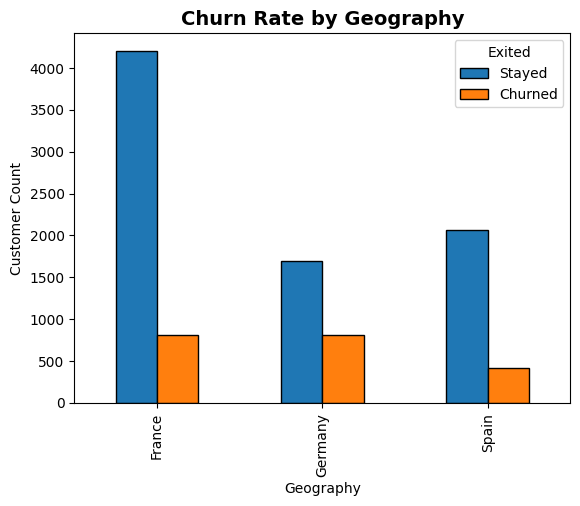

In [8]:
pd.crosstab(df['Geography'], df['Exited']).plot(kind='bar', edgecolor='black')
plt.title('Churn Rate by Geography', fontsize=14, fontweight='bold')
plt.ylabel('Customer Count')
plt.xlabel('Geography')
plt.legend(title='Exited', labels=['Stayed', 'Churned'])
plt.show()

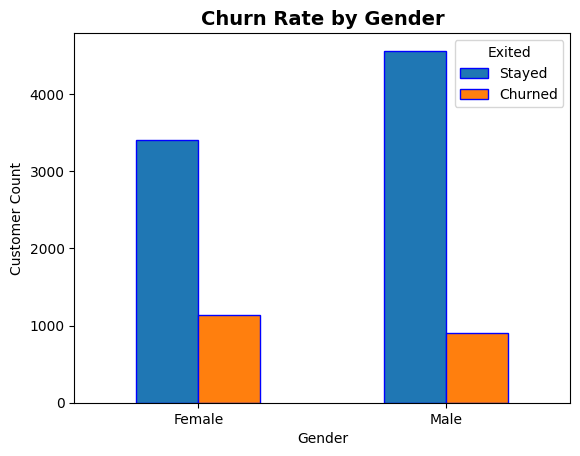

In [9]:
pd.crosstab(df['Gender'], df['Exited']).plot(kind='bar',edgecolor='blue')
plt.title('Churn Rate by Gender', fontsize=14, fontweight='bold')
plt.ylabel('Customer Count')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(title='Exited', labels=['Stayed', 'Churned'])
plt.show()

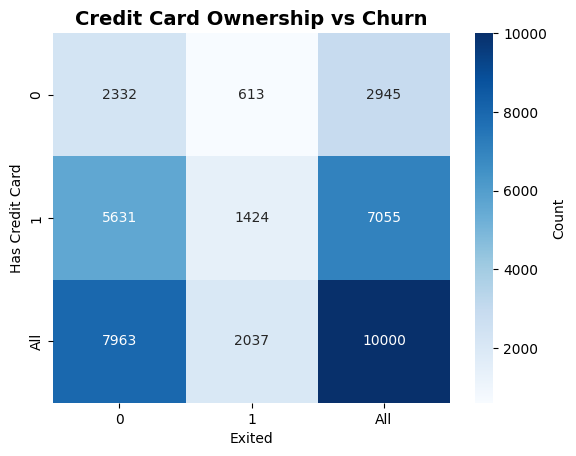

In [10]:
cm_card = pd.crosstab(df['HasCrCard'], df['Exited'], margins=True)
sns.heatmap(cm_card, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Credit Card Ownership vs Churn', fontsize=14, fontweight='bold')
plt.xlabel('Exited')
plt.ylabel('Has Credit Card')
plt.show()

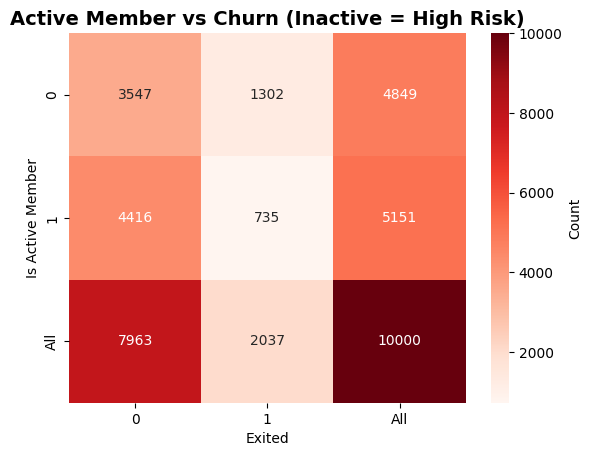

In [11]:
cm_active = pd.crosstab(df['IsActiveMember'], df['Exited'], margins=True)
sns.heatmap(cm_active, annot=True, fmt='d', cmap='Reds', cbar_kws={'label': 'Count'})
plt.title('Active Member vs Churn (Inactive = High Risk)', fontsize=14, fontweight='bold')
plt.xlabel('Exited')
plt.ylabel('Is Active Member')
plt.show()

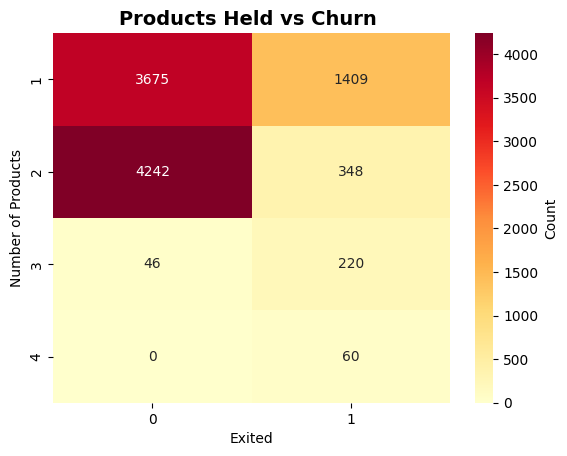

In [12]:
cm_products = pd.crosstab(df['NumOfProducts'], df['Exited'])
sns.heatmap(cm_products, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Count'})
plt.title('Products Held vs Churn ', fontsize=14, fontweight='bold')
plt.xlabel('Exited')
plt.ylabel('Number of Products')
plt.show()

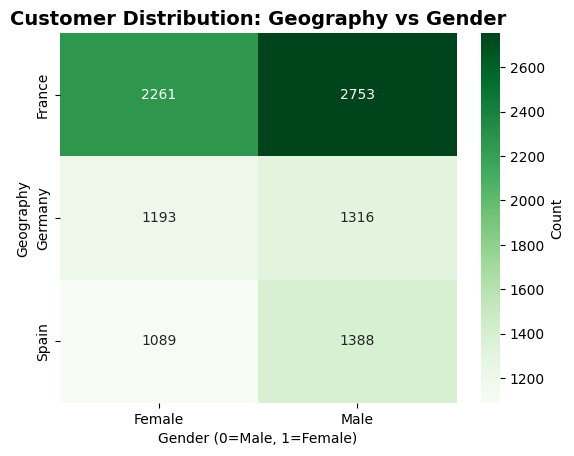

In [13]:
cm_geo_gender = pd.crosstab(df['Geography'], df['Gender'])
sns.heatmap(cm_geo_gender, annot=True, fmt='d', cmap='Greens', cbar_kws={'label': 'Count'})
plt.title('Customer Distribution: Geography vs Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender (0=Male, 1=Female)')
plt.ylabel('Geography')
plt.show()

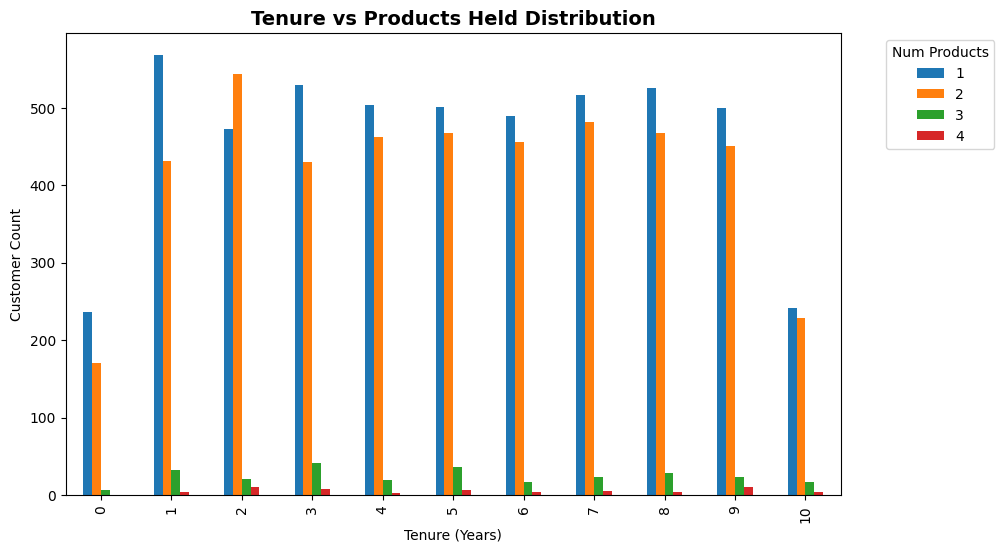

In [14]:
pd.crosstab(df['Tenure'], df['NumOfProducts']).plot(kind='bar', figsize=(10,6))
plt.title('Tenure vs Products Held Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Customer Count')
plt.xlabel('Tenure (Years)')
plt.legend(title='Num Products', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

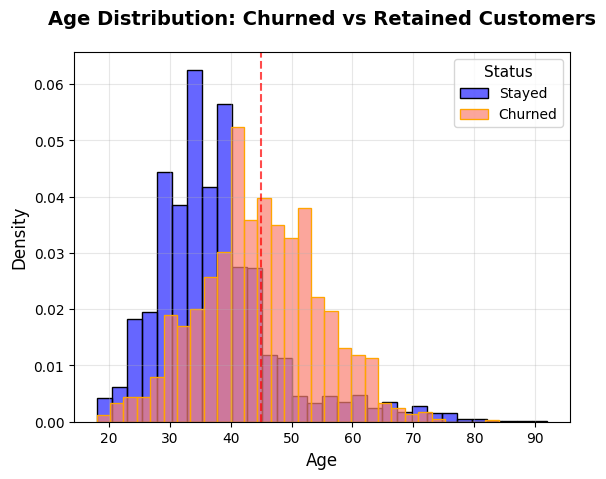

In [15]:
sns.histplot(data=df[df['Exited']==0], x='Age', bins=30, alpha=0.6, 
             color='blue', label='Stayed', stat='density', edgecolor='black')

sns.histplot(data=df[df['Exited']==1], x='Age', bins=30, alpha=0.7,
             color='salmon', label='Churned', stat='density', edgecolor='orange')

plt.title('Age Distribution: Churned vs Retained Customers', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Status', title_fontsize=11, fontsize=10)
plt.grid(True, alpha=0.3)

# Add vertical line at churn peak
plt.axvline(x=45, color='red', linestyle='--', alpha=0.7, label='Churn Peak ~45')
plt.show()

In [16]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [17]:
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True) #droping useless features

In [18]:
df= pd.get_dummies(df,columns=(['Geography','Gender']),dtype=int)

In [19]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  int64  
 10  Geography_Germany  10000 non-null  int64  
 11  Geography_Spain    10000 non-null  int64  
 12  Gender_Female      10000 non-null  int64  
 13  Gender_Male        10000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.1 MB


In [21]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.008928,0.005538,0.004780,0.002857,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.039208,0.046897,-0.001685,0.027544,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.002848,-0.000567,0.003868,-0.014733,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.231329,0.401110,-0.134892,-0.012087,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.001230,-0.010419,0.009039,0.021859,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.002467,0.010577,-0.013480,-0.005766,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.003317,-0.020486,0.016732,-0.022544,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.003332,0.010297,-0.006482,0.008112,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.104955,0.173488,-0.052667,0.106512,-0.106512
Geography_France,-0.008928,-0.039208,-0.002848,-0.231329,0.001230,0.002467,0.003317,-0.003332,-0.104955,1.000000,-0.580359,-0.575418,-0.006772,0.006772


<Axes: >

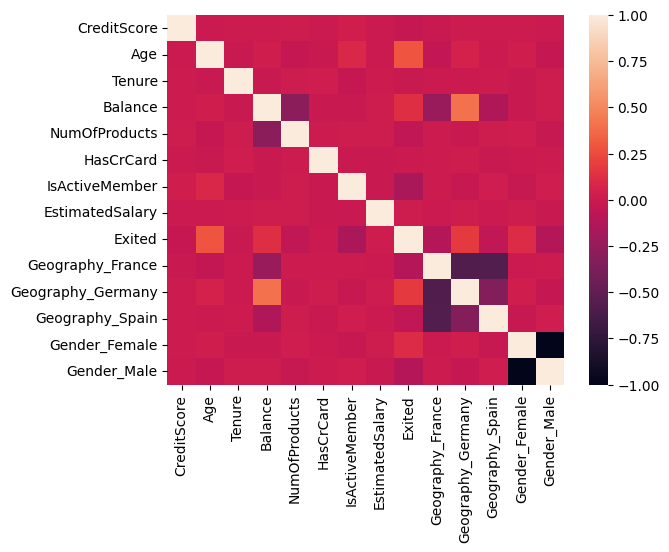

In [22]:
sns.heatmap(df.corr())

In [23]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [24]:
new_df = df[['CreditScore','Age', 'Tenure', 'Balance',
             'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
              'Exited']]


<Axes: >

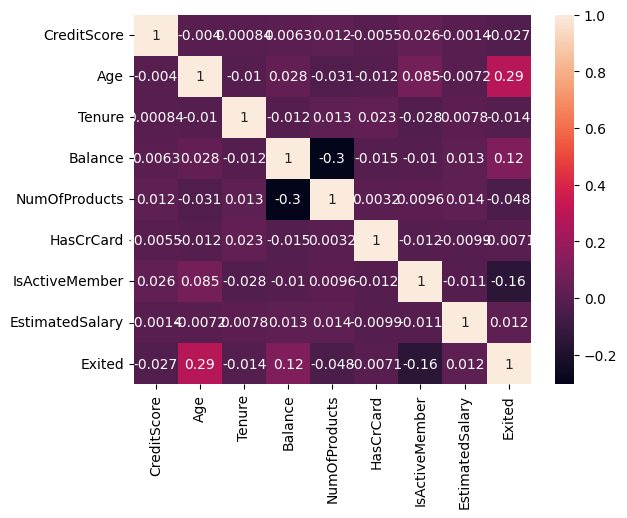

In [25]:
sns.heatmap(new_df.corr(),annot=True)

In [26]:
df.to_csv("churn_cleaned.csv",index=False)